<a href="https://colab.research.google.com/github/chacelin993/DSPS_CLin/blob/main/hw9/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip install kaggle

In [4]:
cd drive/MyDrive/DSPS2023/

/content/drive/MyDrive/DSPS2023


In [5]:
envs = json.load(open(".kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [6]:
!kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                           29MB  2023-11-16 01:38:36           1176        128  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing Price Prediction Data                   763KB  2023-11-21 17:56:32           4455         85  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                   41MB  2023-11-15 07:32:56           1453        113  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT Proper Train Dat

In [ ]:
!kaggle competitions download -c higgs-boson

User cancelled operation


In [ ]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            


In [ ]:
!unzip training.zip
!unzip random_submission.zip
!unzip test.zip

Archive:  training.zip
  inflating: training.csv            
Archive:  random_submission.zip
  inflating: random_submission.csv   
Archive:  test.zip
  inflating: test.csv                


In [9]:
cd kaggleHiggs

/content/drive/MyDrive/DSPS2023/kaggleHiggs


In [10]:
higgsdata = pd.read_csv("training.csv")

In [11]:
higgsdata.shape

(250000, 33)

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [12]:
import missingno as msno

In [13]:
higgsdata.replace(-999,np.nan,inplace=True)

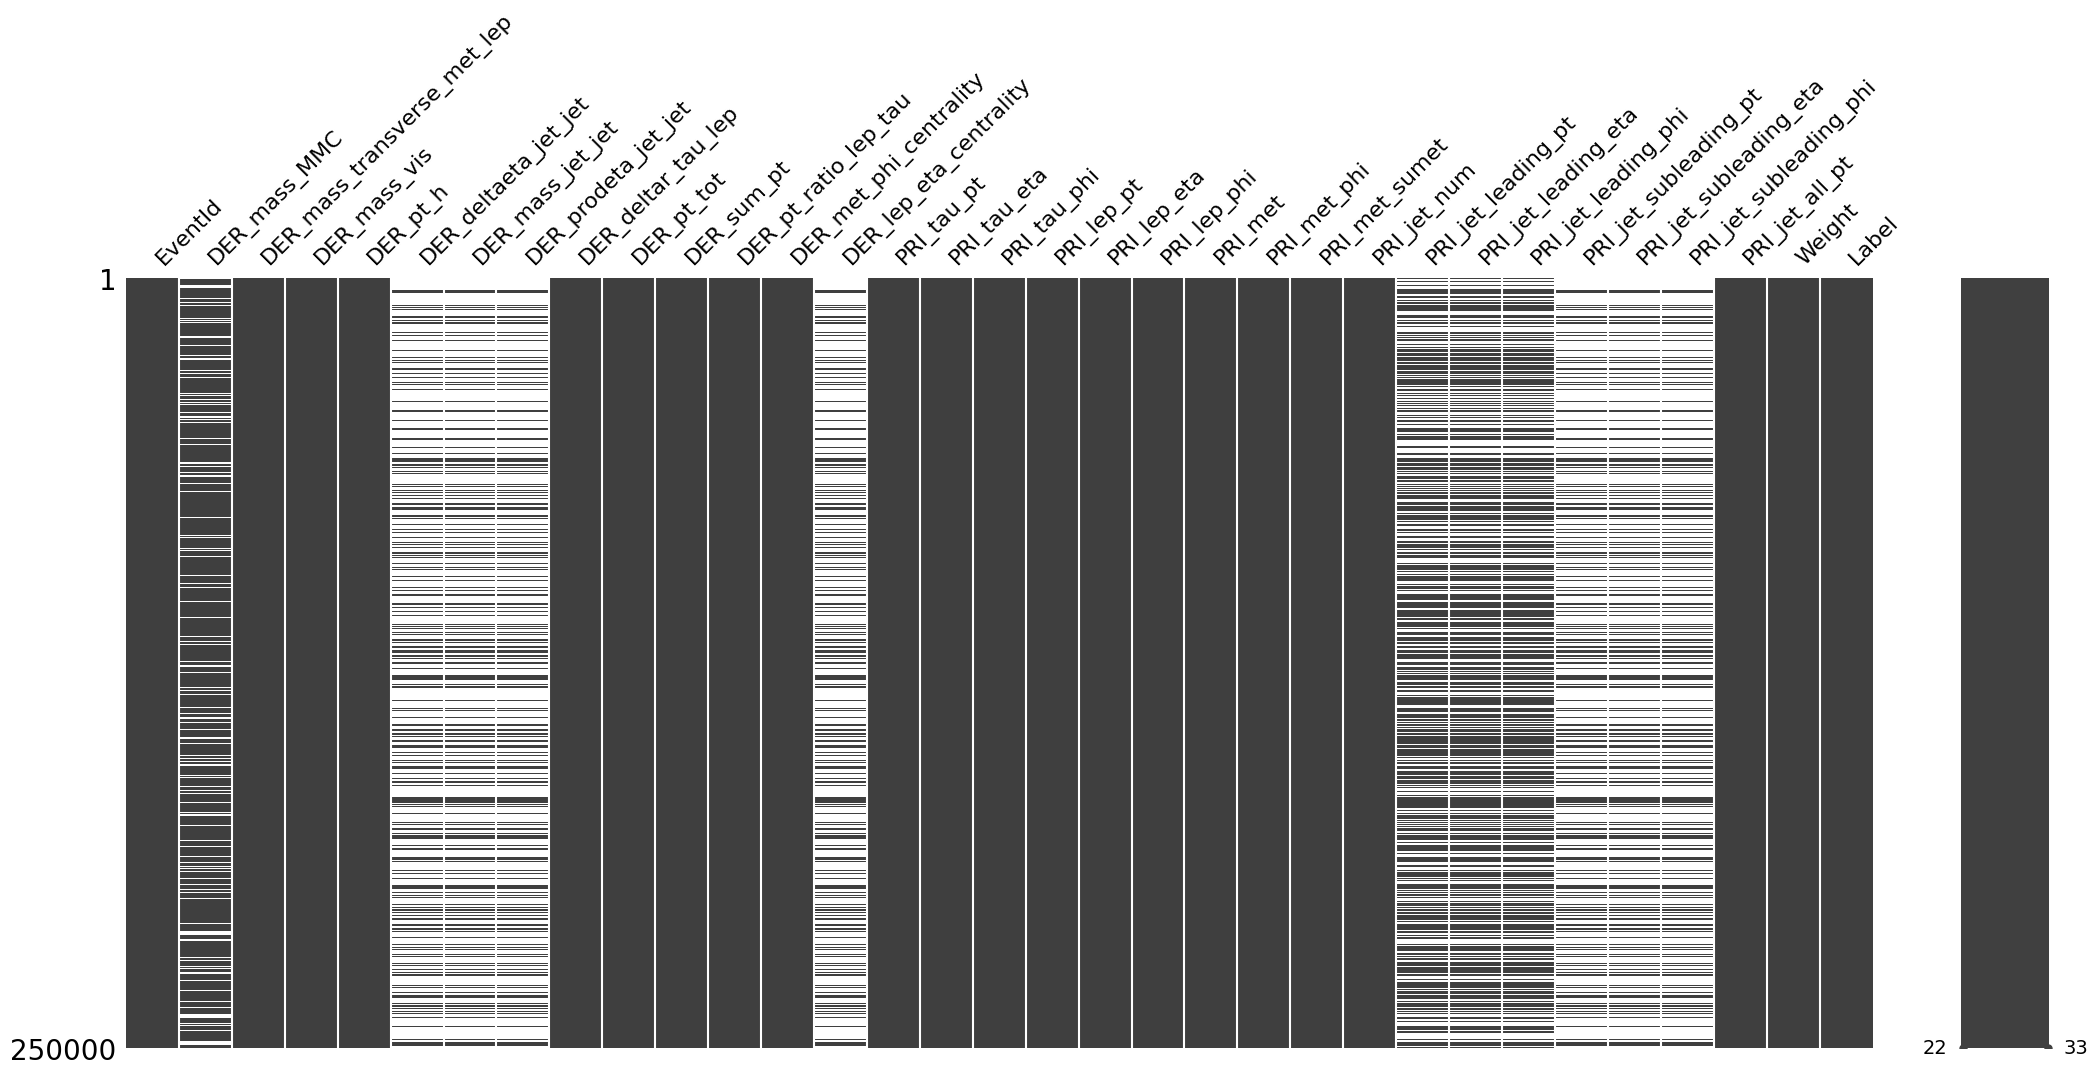

In [14]:
msno.matrix(higgsdata)
higgsdata = higgsdata.dropna(axis=1, how='any')

<Axes: >

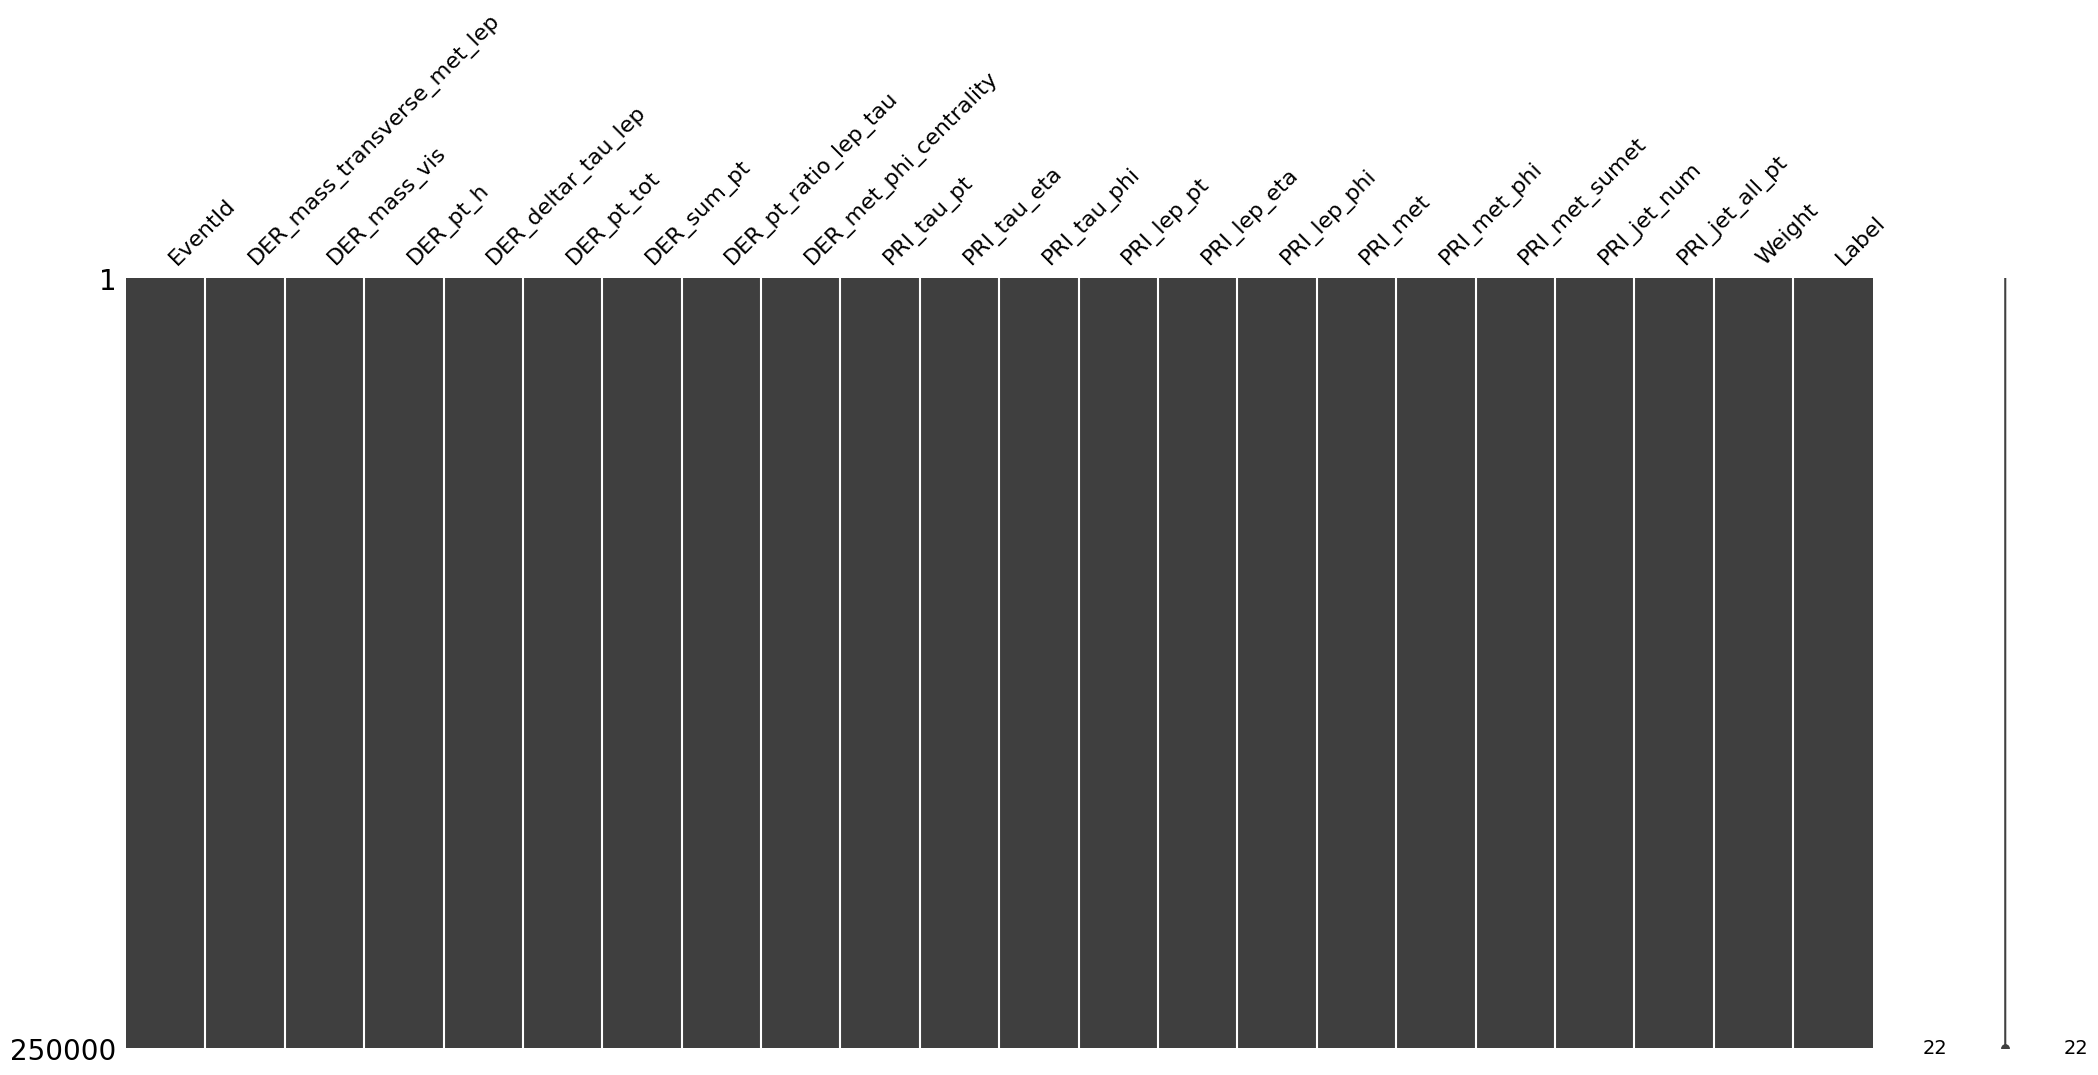

In [15]:
msno.matrix(higgsdata)

In [16]:
higgsdata.shape

(250000, 22)

In [17]:
labels=higgsdata['Label'].values
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [18]:
weights=higgsdata['Weight'].values
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

In [19]:
from sklearn.model_selection import train_test_split
X = higgsdata.drop(['Weight', 'Label'], axis=1)
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [21]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1.0, max_features=None)

In [22]:
rf.fit(X_train, y_train)
gbt.fit(X_train, y_train)

GradientBoostingClassifier()

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [23]:
print(rf.score(X_train,y_train),rf.score(X_test, y_test))

1.0 0.82838


The score for random forest on the training set is 1 but on the testing set is significantly lower. This is a classic sign of overfitting, where the model performs extremely well on the training data but fails to do so on to the unseen data.

In [24]:
print(gbt.score(X_train,y_train), gbt.score(X_test,y_test))

0.820915 0.81854


The scores of gradient boosting are close on the training and testing set, which means the model is generlazing well to the unseen data. But whether the score itself is too low or not is difficult to tell without more knowledge on the background.

- Produce a confusion matrix for each model and compare them






In [25]:
rf_pred = rf.predict(X_test)
gbt_pred = gbt.predict(X_test)

In [26]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)


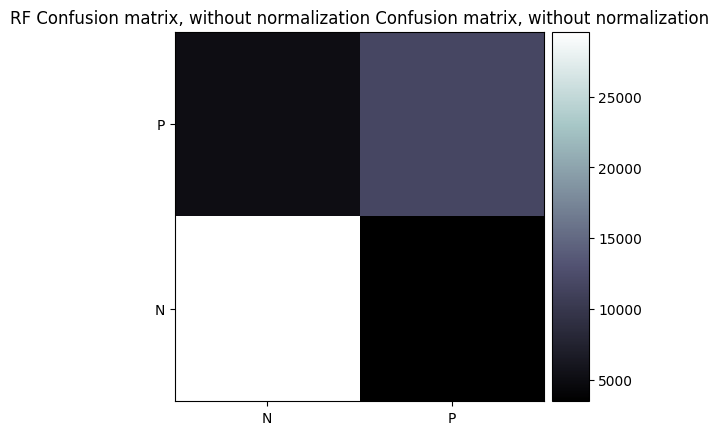

In [27]:
plot_confusion_matrix(y_test, rf_pred, title='RF Confusion matrix, without normalization')

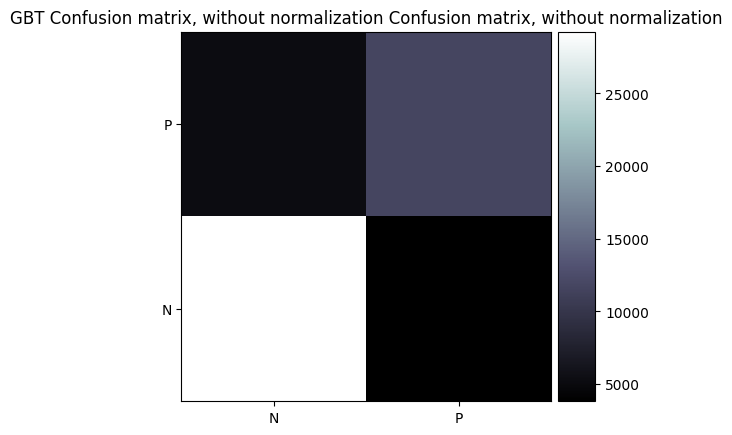

In [28]:
plot_confusion_matrix(y_test, gbt_pred, title='GBT Confusion matrix, without normalization')

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [29]:
y = weights
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(traindata_weights, train_weights)
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0)
gbtR.fit(traindata_weights, train_weights)

GradientBoostingRegressor(random_state=0)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
rf_predictions = rfR.predict(testdata_weights)
gbt_predictions = gbtR.predict(testdata_weights)
rf_l1 = mean_absolute_error(test_weights, rf_predictions)
gbt_l1 = mean_absolute_error(test_weights, gbt_predictions)
rf_l2 = mean_squared_error(test_weights, rf_predictions)
gbt_l2 = mean_squared_error(test_weights, gbt_predictions)
print(f"L1 Loss RandomForest: {rf_l1}")
print(f"L1 Loss GradientBoosting: {gbt_l1}")
print(f"L2 Loss RandomForest: {rf_l2}")
print(f"L2 Loss GradientBoosting: {gbt_l2}")

L1 Loss RandomForest: 1.0031994108410043
L1 Loss GradientBoosting: 0.856431626407566
L2 Loss RandomForest: 1.8285611549455072
L2 Loss GradientBoosting: 1.3797303619171302


Lower loss indicates better performance. Comparing L1 with L2 for both models, L1 does better than L2 for both models. Compare models for L1 and L2: GBT does better for both L1 and L2. In summary, L1 GBT performs the best and L2 RF performs the worst.

# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [43]:
from pprint import pprint
feature_importances = rfR.feature_importances_
indices_of_top_features = np.argsort(feature_importances)[-4:]
best_features_index = higgsdata.columns[indices_of_top_features]

In [44]:
best_features_index

Index(['PRI_tau_pt', 'DER_pt_h', 'DER_mass_transverse_met_lep',
       'PRI_jet_all_pt'],
      dtype='object')

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [38]:
higgsdata[best_features_index]

,PRI_tau_pt,DER_pt_h,DER_mass_transverse_met_lep,PRI_jet_all_pt
0,32.638,27.980,51.655,113.497
1,42.014,48.146,68.768,46.226
2,32.154,35.635,162.172,44.251
3,22.647,0.414,81.417,-0.000
4,28.209,16.405,16.915,0.000
...,...,...,...,...
249995,24.754,5.042,71.989,0.000
249996,23.416,22.439,58.179,-0.000
249997,35.636,39.757,60.526,41.992
249998,27.944,13.504,19.362,0.000


The RandomForest model has identified 'PRI_tau_pt', 'DER_pt_h', 'DER_mass_transverse_met_lep', and 'PRI_jet_all_pt' as the four most important features for predicting the weight of the particles, in which prefix "PRI" are raw quantities directly measured by the detector and "DER" are the ones computed from the PRI. The RF model selected two PRI and two DER, which is interesting because the information in the DER is a subset of that in the PRI, and yet the DERs are identified as more important than other PRIs.

In [ ]:
feature_importances = rfR.feature_importances_
indices_of_top_features = np.argsort(feature_importances)[-10:]
best_features_index = higgsdata.columns[indices_of_top_features]


In [40]:
random_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt'],
}
pprint(random_grid)


{'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
random_search.fit(...


In [ ]:
print("Tuned RF  Parameters: {}".format(...))
print("Best score is {}".format(...))


In [ ]:
df = pd.DataFrame(random_search.cv_results_)


In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.162951,0.0518,0.103968,0.002995,100,sqrt,3,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.796656,0.79656,0.78728,0.79632,0.792703,0.793904,0.003627,1


Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
